In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print('iris_dataset의 키:\n', iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print('타깃의 이름: \n', iris_dataset['target_names'])

타깃의 이름: 
 ['setosa' 'versicolor' 'virginica']


In [ ]:
print('특징의 이름: \n', iris_dataset['feature_names'])

특징의 이름: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print('data의 타입:', type(iris_dataset['data']))

data의 타입: <class 'numpy.ndarray'>


In [ ]:
print('data의 크기', iris_dataset['data'].shape)

data의 크기 (150, 4)


In [ ]:
print('data의 처음 다섯개:\n', iris_dataset['data'][:5])

data의 처음 다섯개:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print('target의 타입:', type(iris_dataset['target']))

target의 타입: <class 'numpy.ndarray'>


In [ ]:
print('target의 크기:', iris_dataset['target'].shape)

target의 크기: (150,)


In [ ]:
print('target:\n', iris_dataset['target'])

target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 데이터의 준비
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0,test_size=0.3)

In [ ]:
print('X_train 크기:', X_train.shape)
print('y_train 크기:', y_train.shape)

X_train 크기: (105, 4)
y_train 크기: (105,)


In [ ]:
print('X_test 크기:', X_test.shape)
print('y_test 크기:', y_test.shape)

X_test 크기: (45, 4)
y_test 크기: (45,)


In [ ]:
# 데이터의 시각화 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0934c1790>,
      dtype=object)

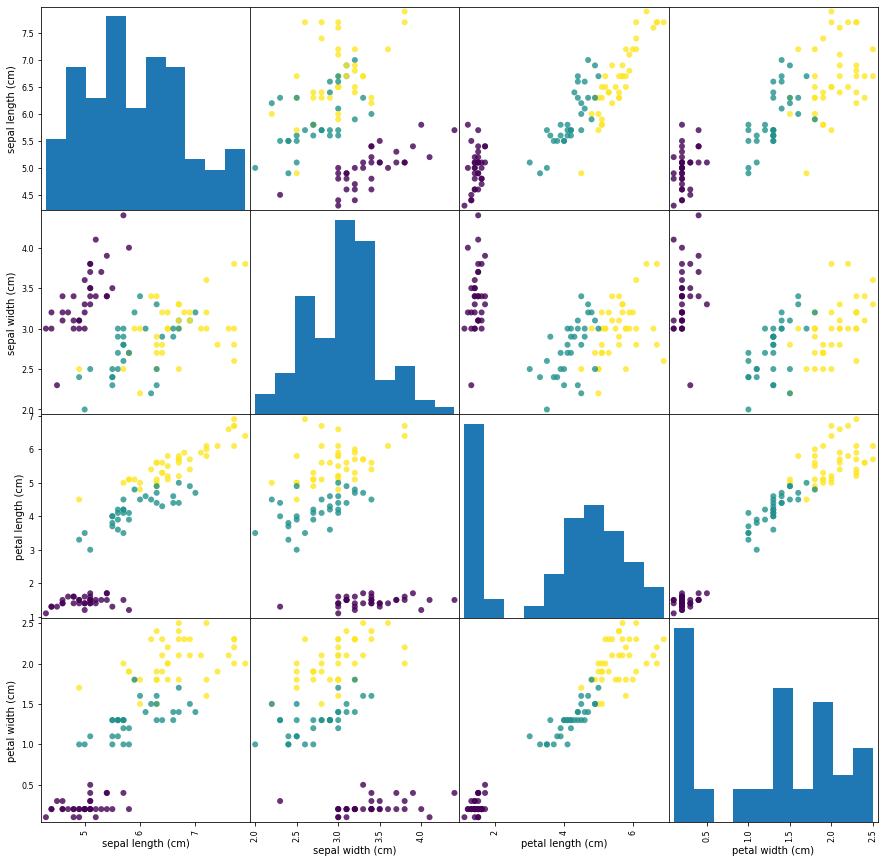

In [ ]:
pd.plotting.scatter_matrix(iris_dataframe, figsize=(15,15), 
                           marker='o',
                           c=y_train, 
                           cmap='viridis',
                           alpha=0.8)

In [ ]:
# 첫 번째 머신 러닝 모델: k-최근접 알고리즘
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# 예측하기
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]]) # 예측용 샘플 데이터
X_new 

array([[5. , 2.9, 1. , 0.2]])

In [ ]:
prediction = knn.predict(X_new)
print('예측:', prediction)
print('예측한 타깃의 이름:', iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


In [ ]:
# 모델의 평가
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값:\n', y_pred)

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [ ]:
print('테스트 세트에 대한 정확도:\n',np.mean(y_pred == y_test) * 100)

테스트 세트에 대한 정확도:
 97.77777777777777


In [ ]:
print('테스트 세트에 대한 정확도:\n', knn.score(X_test, y_test))

테스트 세트에 대한 정확도:
 0.9777777777777777
